# Variable number of users !
let's try to change the number of users on the fly and compare those guys :-)

In [8]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

from tdfs.routines import tdfs_routine, tdfs_log_upper_bound
from rho_rand.routines import rho_rand_routine
from mega.routines import mega_routine
from musical_chairs.routines import mc_routine
from plots import regret_plt

In [9]:
#  UNIVERSE PARAMETERS
n_users = 5
n_arms = 5
t_horizon = 10000
arm_means = [0.2, 0.3, 0.5, 0.8, 0.85]
best_arms_mean = np.sort(arm_means)[-n_users:]

In [10]:
# MEGA PARAMETERS
mega_params = {
    'c': 0.1,
    'd': 0.05,
    'alpha': 0.5,
    'beta': 0.8,
    'persistence_proba_init': 0.6
}

In [11]:
mega_rewards, collisions, nbr_of_users = mega_routine(n_users, mega_params, n_arms, t_horizon, arm_means, alg='eps', variable=True)
total_rewards_mega = np.sum(mega_rewards, axis=0)

5 active users !
5 active users !
4 active users !
3 active users !
5 active users !
5 active users !
4 active users !
3 active users !
4 active users !
2 active users !


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


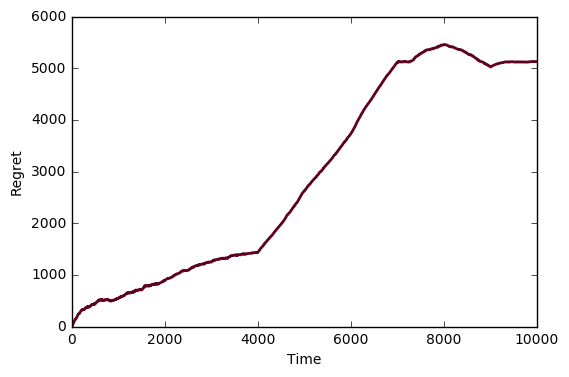

In [12]:
plt.ylabel("Regret")
plt.xlabel("Time")
cmap = plt.get_cmap("cool")

#best arms
best_arms = np.zeros(t_horizon)
for i in range(t_horizon):
    best_arms[i] = np.sort(arm_means)[-nbr_of_users[i]:].sum()

regret = np.cumsum(best_arms - total_rewards_mega)
plt.plot(regret, linewidth=2, color='#5F021F')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()